In [1]:
%reload_ext autoreload

In [2]:
%autoreload 2
%matplotlib inline

In [3]:
from fastai import *
from fastai.vision import *

In [4]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True)
    Download `url` if doesn't exist to `fname` and un-tgz to folder `dest`



In [5]:
path=untar_data(URLs.PETS);path

PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/oxford-iiit-pet')

In [6]:
path.ls()

[PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/oxford-iiit-pet/images'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/oxford-iiit-pet/annotations')]

In [7]:
path_anno = path/'annotations'
path_img=path/'images'

In [9]:
path_img

PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/oxford-iiit-pet/images')

In [10]:
fnames = get_image_files(path_img)

In [11]:
fnames[:5]

[PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/oxford-iiit-pet/images/leonberger_34.jpg'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/oxford-iiit-pet/images/pug_203.jpg'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/oxford-iiit-pet/images/Siamese_203.jpg'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/oxford-iiit-pet/images/scottish_terrier_98.jpg'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/oxford-iiit-pet/images/beagle_76.jpg')]

In [15]:
np.random.seed(2)

In [16]:
pat = r'/([^/]+)_\d+.jpg$'

In [18]:
help(ImageDataBunch.from_name_re)

Help on method from_name_re in module fastai.vision.data:

from_name_re(path: Union[pathlib.Path, str], fnames: Collection[pathlib.Path], pat: str, valid_pct: int = 0.2, test: str = None, **kwargs) method of builtins.type instance



In [19]:
data = ImageDataBunch.from_name_re(path_img,fnames,pat,ds_tfms=get_transforms(),bs=64,size=224)

In [23]:
data.normalize(imagenet_stats)

In [24]:
data.stats

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

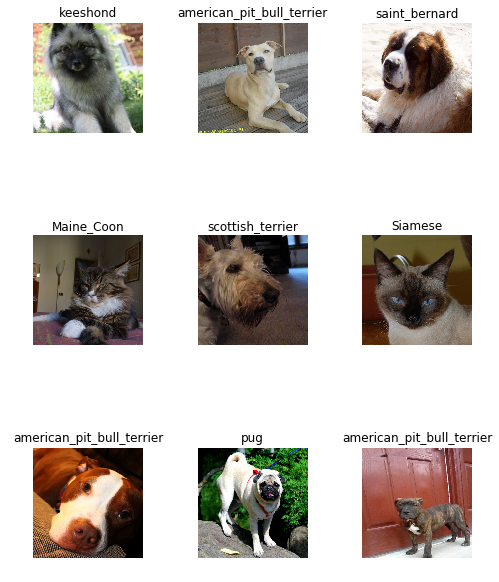

In [27]:
data.show_batch(rows=3,figsize=(7,9))

In [29]:
print(data.classes)

['leonberger', 'pug', 'Siamese', 'scottish_terrier', 'beagle', 'Birman', 'Abyssinian', 'great_pyrenees', 'chihuahua', 'havanese', 'japanese_chin', 'yorkshire_terrier', 'Persian', 'Ragdoll', 'pomeranian', 'newfoundland', 'Bombay', 'shiba_inu', 'german_shorthaired', 'Bengal', 'samoyed', 'boxer', 'wheaten_terrier', 'miniature_pinscher', 'english_cocker_spaniel', 'Maine_Coon', 'Sphynx', 'British_Shorthair', 'staffordshire_bull_terrier', 'keeshond', 'saint_bernard', 'american_pit_bull_terrier', 'Russian_Blue', 'american_bulldog', 'english_setter', 'Egyptian_Mau', 'basset_hound']


In [31]:
len(data.classes)

37

In [32]:
data.c

37

## Training resnet 34

In [33]:
learn = create_cnn(data,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/nbuser/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 84839420.35it/s]


In [34]:
learn.fit_one_cycle(4)

Total time: 03:10
epoch  train_loss  valid_loss  error_rate
1      1.160731    0.288215    0.087824    (00:50)
2      0.508048    0.230540    0.075848    (00:46)
3      0.314699    0.208198    0.070526    (00:46)
4      0.249619    0.194977    0.067864    (00:46)



In [35]:
learn.save('first_model')

## Evaluation

In [36]:
interp = ClassificationInterpretation.from_learner(learn)

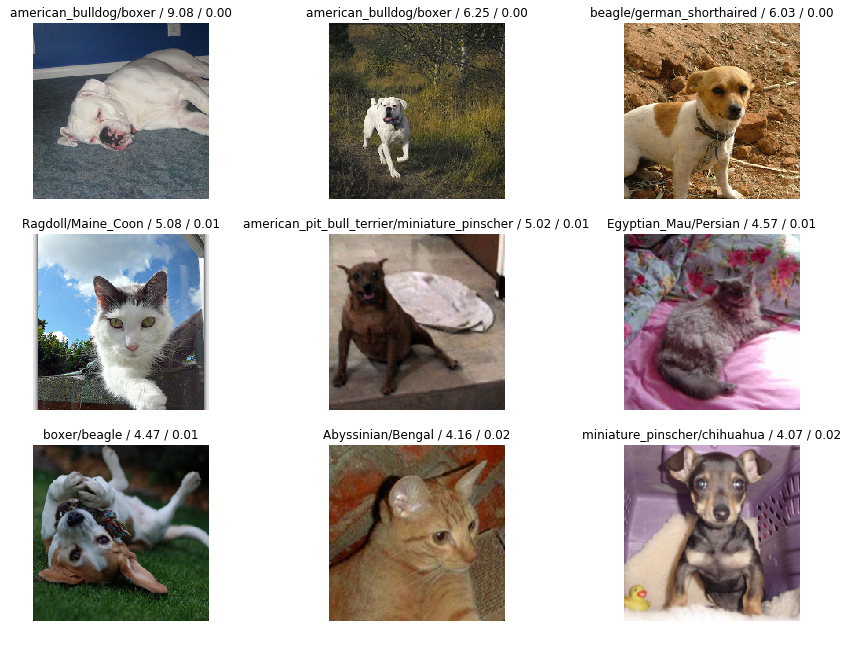

In [38]:
interp.plot_top_losses(9,figsize=(15,11))

In [40]:
doc(interp.plot_top_losses)

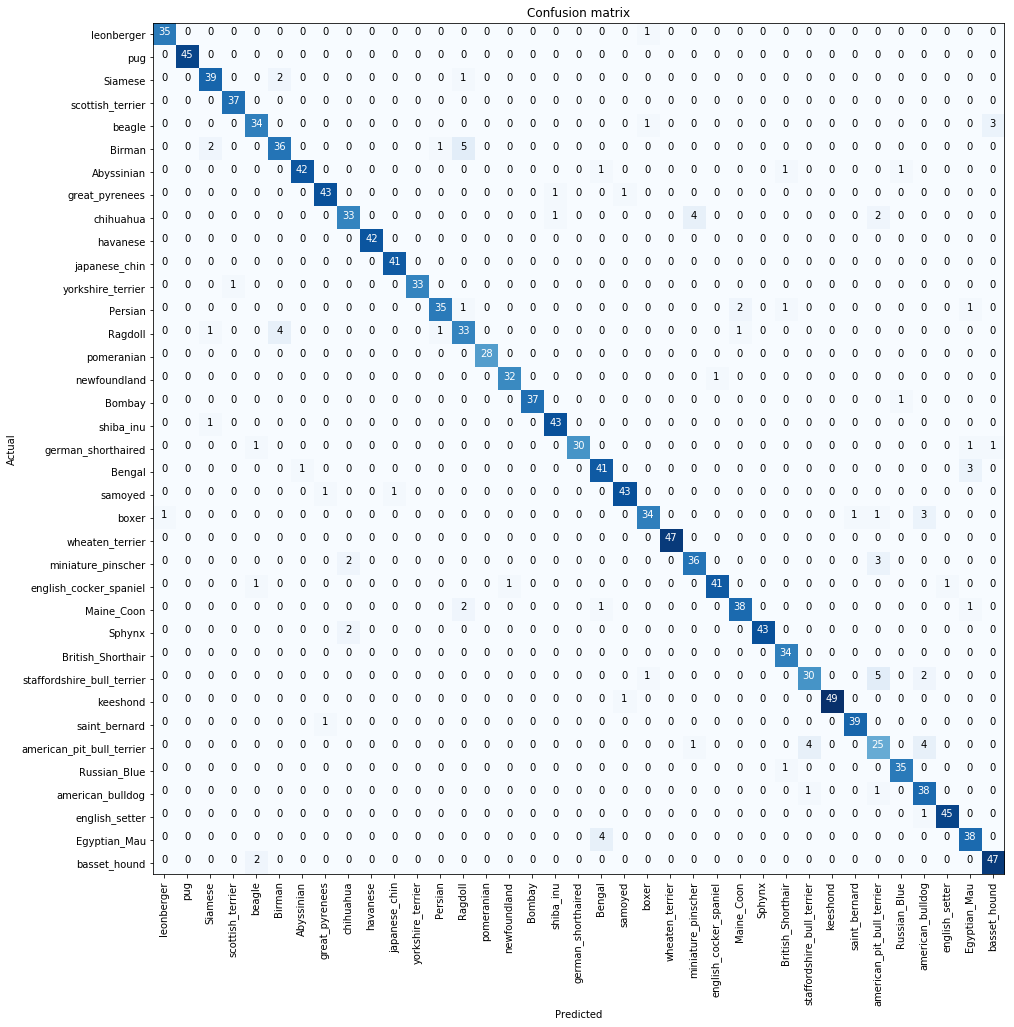

In [42]:
interp.plot_confusion_matrix(figsize=(14,18))

In [45]:
interp.most_confused(min_val=2)

[('Birman', 'Ragdoll', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('chihuahua', 'miniature_pinscher', 4),
 ('Ragdoll', 'Birman', 4),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('american_pit_bull_terrier', 'american_bulldog', 4),
 ('Egyptian_Mau', 'Bengal', 4),
 ('beagle', 'basset_hound', 3),
 ('Bengal', 'Egyptian_Mau', 3),
 ('boxer', 'american_bulldog', 3),
 ('miniature_pinscher', 'american_pit_bull_terrier', 3)]

### More Training

In [48]:
doc(learn.unfreeze)

In [49]:
learn.unfreeze()

In [50]:
learn.fit_one_cycle(1)

Total time: 01:03
epoch  train_loss  valid_loss  error_rate
1      1.120541    0.589417    0.198270    (01:03)



In [51]:
learn.load('first_model')

In [52]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


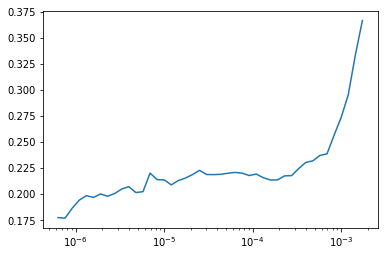

In [54]:
learn.recorder.plot()

In [55]:
learn.unfreeze()

In [57]:
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-4))

Total time: 02:05
epoch  train_loss  valid_loss  error_rate
1      0.199844    0.183451    0.063872    (01:02)
2      0.188938    0.185891    0.070526    (01:02)



## Training Resent50

In [73]:
data = ImageDataBunch.from_name_re(path_img,fnames,pat,ds_tfms=get_transforms(),size=299,bs=16)
data.normalize(imagenet_stats)

In [71]:
doc(get_transforms)

In [74]:
learn_2 = create_cnn(data,models.resnet50,metrics=error_rate)

In [75]:
learn_2.fit_one_cycle(2)

Total time: 06:48
epoch  train_loss  valid_loss  error_rate
1      0.550412    0.316075    0.111257    (03:35)
2      0.294076    0.201109    0.061224    (03:12)



In [76]:
data = ImageDataBunch.from_name_re(path_img,fnames,pat,ds_tfms=get_transforms(),size=299,bs=64)
data.normalize(imagenet_stats)

In [77]:
learn_2 = create_cnn(data,models.resnet50,metrics=error_rate)

In [78]:
learn_2.fit_one_cycle(5)

Total time: 16:00
epoch  train_loss  valid_loss  error_rate
1      0.721232    0.226642    0.069939    (03:34)
2      0.352092    0.200348    0.068594    (03:07)
3      0.249052    0.178780    0.059852    (03:06)
4      0.151618    0.162917    0.049765    (03:06)
5      0.110978    0.153711    0.045730    (03:06)



In [79]:
learn_2.save('pet-reset50')

### evaluate

In [80]:
interep_2= ClassificationInterpretation.from_learner(learn_2)

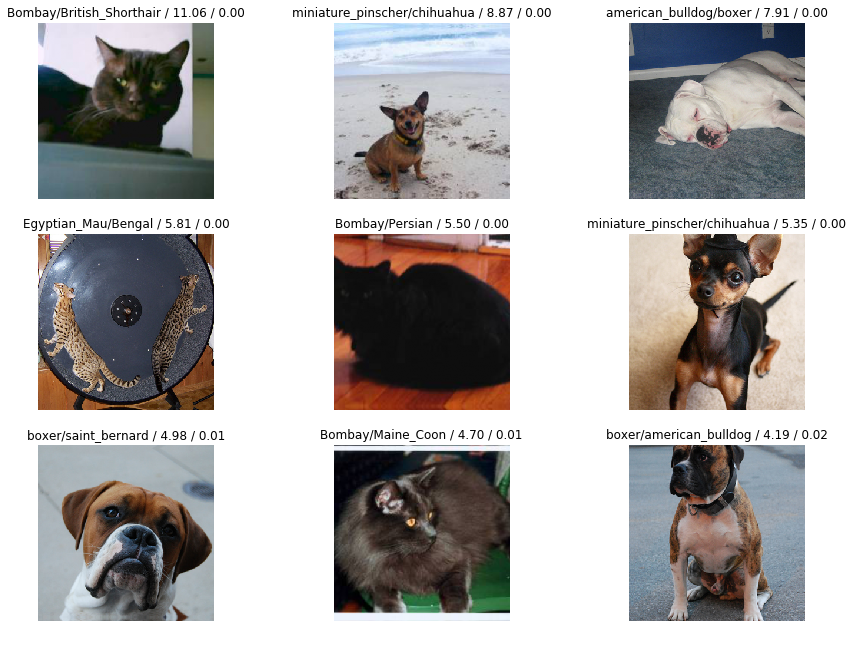

In [86]:
interep_2.plot_top_losses(9,figsize=(15,11))

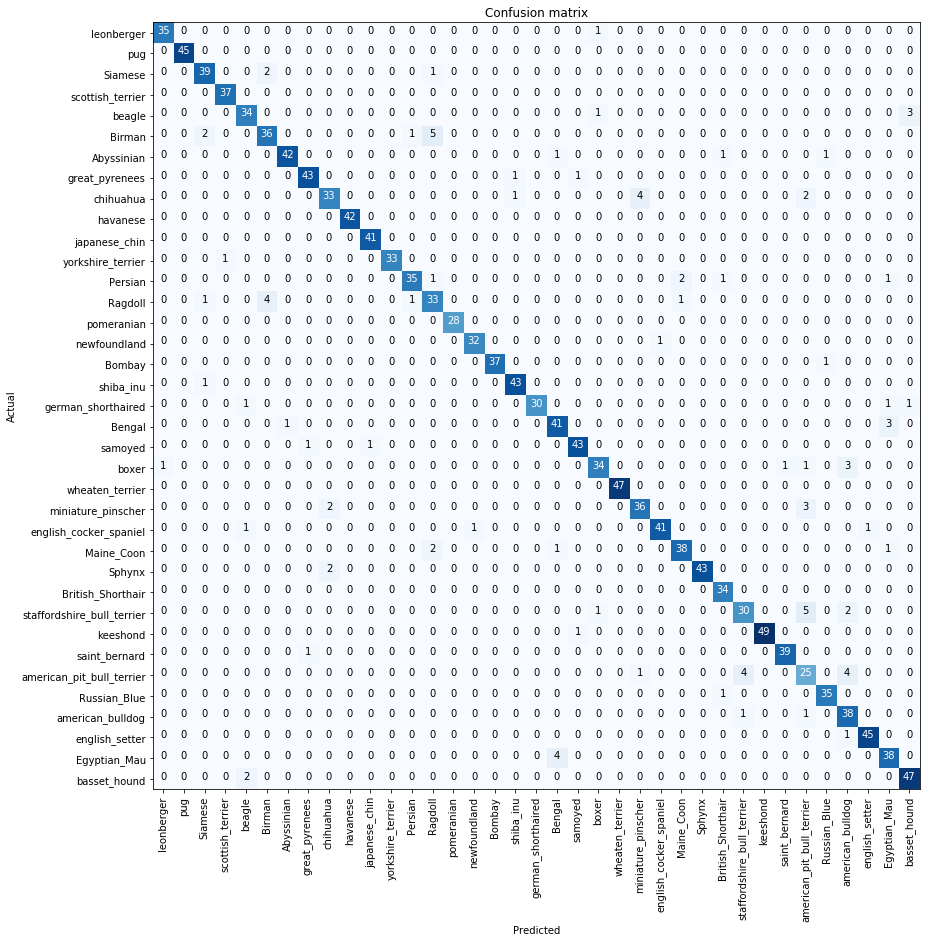

In [90]:
interp.plot_confusion_matrix(figsize=(13,13))